# Part II - (Ford GoBike System Data Exploration)
## by (Eugene Opoku Akosah)


## Investigation Overview

In this report, we will break down a bicycle sharing framework covering the more noteworthy San Francisco Straight region.

We will generally be centered around spans of outings what impacts them the most. Additionally we will see the excursion counts and terms relationship with client types.



## Dataset Overview

The informational collection incorporates data about individual rides made in a bicycle sharing framework covering the more noteworthy San Francisco Sound area.The informational index incorporates informations about individuals and furthermore the actual excursion.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# load in the dataset into a pandas dataframe
trips = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
#data wrangling
#drop nulls
trips = trips.dropna()
trips.isnull().sum()
#Adding durations in minutes
#Converting the seconds into minutes for better understanding of the graph.
trips['duration_min'] = trips['duration_sec'] / 60
#change some datatypes considering datas use case
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',        
        'start_station_id': 'object',
        'end_station_id': 'object',       
        'start_station_latitude': 'object',
        'start_station_longitude':  'object',
        'end_station_latitude':  'object',
        'end_station_longitude':  'object',       
        'bike_id': 'object',
        'member_birth_year': 'object',
        'member_gender': 'category',
        'user_type': 'category',
        'duration_min': 'int64'}

trips = trips.astype(dtype)

# General Distrubution of Durations

First let's take a look at the general distrubution of our duration data to see the avarege durations of trips.


Majority of the trips takes under 20 minute. And trips longer then an hour is quite rare.

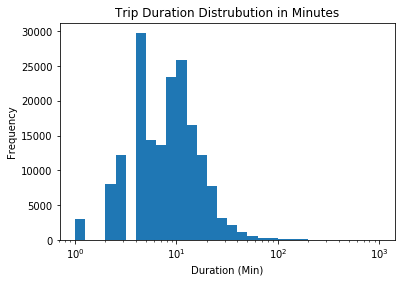

In [4]:
binedges = 10**np.arange(0 , 3+0.1 , 0.1)
plt.xticks([10,20,30,40,50,60],[10,'yirmi','30','40','50','60']);
plt.hist(data = trips , x = 'duration_min' , bins = binedges);
plt.title('Trip Duration Distrubution in Minutes')
plt.xlabel('Duration (Min)');
plt.ylabel('Frequency')
plt.xscale('log');

In [5]:
#Add days in data according to start_time.
trips['start_day'] = trips['start_time'].dt.day_name()
trips.head()
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
#adding start_hour column
trips['start_hour'] = pd.DatetimeIndex(trips['start_time']).hour
trips.head()
# Eliminate trips that takes longer then an hour
trips = trips[trips['duration_sec'] < 3600]

# The relationship between duration, user types and start hours

On avarage, during the day clients have more outing spans then supporters on the entire hours of the day. Supporters spans doesn't change a lot during the day, it is generally somewhere in the range of 7.5 and 10 mins. Clients terms shifts somewhere in the range of 17.5 and 7.5 minutes. It has it top around 13.00. So we can say longer outings are taken around early afternoon by clients.

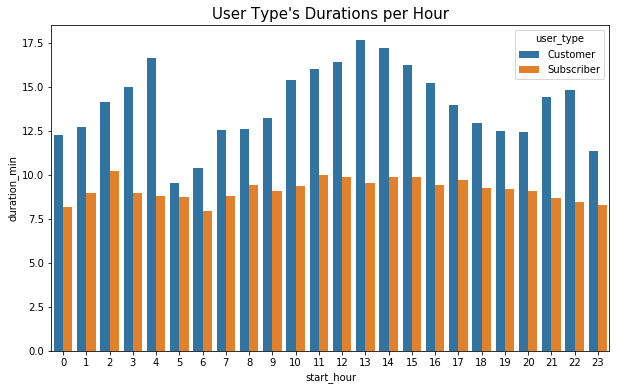

In [6]:

plt.figure(figsize=(10,6))
plt.title("User Type's Durations per Hour", fontsize=15)
plt.xlabel('start_hour')
plt.ylabel('duration_min')
sb.barplot(data=trips, x='start_hour', y='duration_min', ci=None, hue='user_type');

# The relationship between duration, user types and days

Again in this part we see that customers have more trip durations in general. In addition to that we get to see they tend to take longer trips on weekends.

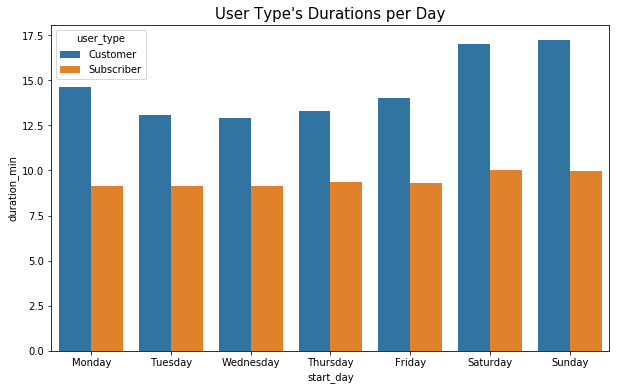

In [7]:
plt.figure(figsize=(10,6))
plt.title("User Type's Durations per Day", fontsize=15)
plt.xlabel('start_day')
plt.ylabel('duration_min')
sb.barplot(data=trips, x='start_day', y='duration_min',order=days, ci=None, hue='user_type');
 

# The relationship between trip days and subscription types

There isn't a huge change among customers between the days. But Subscribers are more likely to use bike system during weekdays, specially on tuesdays and thursdays

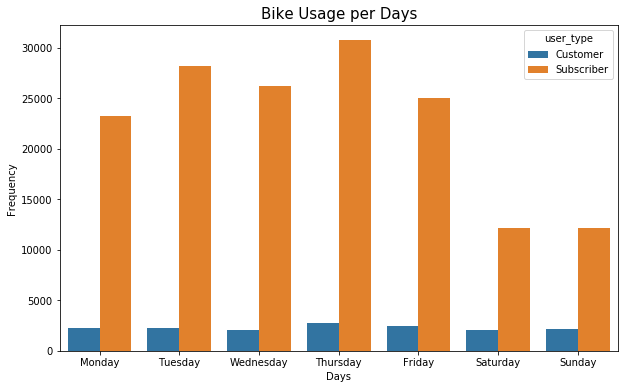

In [8]:
plt.figure(figsize=(10,6))
plt.title('Bike Usage per Days', fontsize=15)
sb.countplot(data=trips, x='start_day', order=days, hue='user_type')
plt.xlabel('Days')
plt.ylabel('Frequency');

In [ ]:
# Generate html slideshow
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 351710 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/